In [1]:
%matplotlib inline

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from mpl_toolkits.basemap import Basemap

import networkx as nx

# Spatial Data and Networks
## Live Demos

In [3]:
earthquake_data = pd.read_csv("data/earthquakes.csv")

In [4]:
earthquake_data

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.2460,145.6160,Earthquake,131.60,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.8630,127.3520,Earthquake,80.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.5790,-173.9720,Earthquake,20.00,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.0760,-23.5570,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.9380,126.4270,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23407,12/28/2016,08:22:12,38.3917,-118.8941,Earthquake,12.30,1.2,40.0,5.6,ML,...,18.0,42.47,0.120,NaN,0.1898,NN00570710,NN,NN,NN,Reviewed
23408,12/28/2016,09:13:47,38.3777,-118.8957,Earthquake,8.80,2.0,33.0,5.5,ML,...,18.0,48.58,0.129,NaN,0.2187,NN00570744,NN,NN,NN,Reviewed
23409,12/28/2016,12:38:51,36.9179,140.4262,Earthquake,10.00,1.8,NaN,5.9,MWW,...,NaN,91.00,0.992,4.8,1.5200,US10007NAF,US,US,US,Reviewed
23410,12/29/2016,22:30:19,-9.0283,118.6639,Earthquake,79.00,1.8,NaN,6.3,MWW,...,NaN,26.00,3.553,6.0,1.4300,US10007NL0,US,US,US,Reviewed


In [5]:
earthquake_data.shape

(23412, 21)

In [6]:
earthquake_data.columns

Index(['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error',
       'Depth Seismic Stations', 'Magnitude', 'Magnitude Type',
       'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap',
       'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID',
       'Source', 'Location Source', 'Magnitude Source', 'Status'],
      dtype='object')

In [7]:
earthquake_data.dtypes

Date                           object
Time                           object
Latitude                      float64
Longitude                     float64
Type                           object
Depth                         float64
Depth Error                   float64
Depth Seismic Stations        float64
Magnitude                     float64
Magnitude Type                 object
Magnitude Error               float64
Magnitude Seismic Stations    float64
Azimuthal Gap                 float64
Horizontal Distance           float64
Horizontal Error              float64
Root Mean Square              float64
ID                             object
Source                         object
Location Source                object
Magnitude Source               object
Status                         object
dtype: object

In [8]:
earthquake_data = earthquake_data[["Date", "Time", "Latitude", "Longitude", "Magnitude", "Depth"]]

In [9]:
earthquake_data

,Date,Time,Latitude,Longitude,Magnitude,Depth
0,01/02/1965,13:44:18,19.2460,145.6160,6.0,131.60
1,01/04/1965,11:29:49,1.8630,127.3520,5.8,80.00
2,01/05/1965,18:05:58,-20.5790,-173.9720,6.2,20.00
3,01/08/1965,18:49:43,-59.0760,-23.5570,5.8,15.00
4,01/09/1965,13:32:50,11.9380,126.4270,5.8,15.00
...,...,...,...,...,...,...
23407,12/28/2016,08:22:12,38.3917,-118.8941,5.6,12.30
23408,12/28/2016,09:13:47,38.3777,-118.8957,5.5,8.80
23409,12/28/2016,12:38:51,36.9179,140.4262,5.9,10.00
23410,12/29/2016,22:30:19,-9.0283,118.6639,6.3,79.00


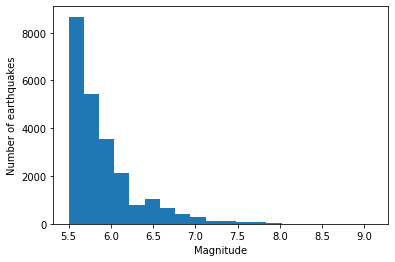

In [15]:
plt.hist(earthquake_data.Magnitude, bins = 20)

plt.xlabel("Magnitude")
plt.ylabel("Number of earthquakes")
plt.show()

In [16]:
earthquake_data[earthquake_data.Magnitude >= 9]

,Date,Time,Latitude,Longitude,Magnitude,Depth
17083,12/26/2004,00:58:53,3.295,95.982,9.1,30.0
20501,03/11/2011,05:46:24,38.297,142.373,9.1,29.0


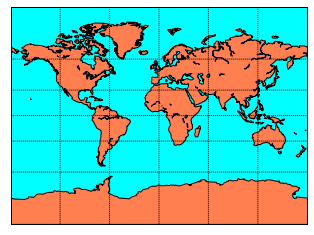

In [34]:
m = Basemap(
    projection = "mill",
    llcrnrlat = -90,
    urcrnrlat = 90,
    llcrnrlon = -180,
    urcrnrlon = 180)
m.drawcoastlines()
m.fillcontinents(color = "coral", lake_color = "aqua")
m.drawparallels(np.arange(-90, 91, 30))
m.drawmeridians(np.arange(-180, 181, 60))
m.drawmapboundary(fill_color = "aqua")
plt.show()

In [38]:
earthquake_x, earthquake_y = m(
    earthquake_data.Longitude.tolist(),
    earthquake_data.Latitude.tolist())

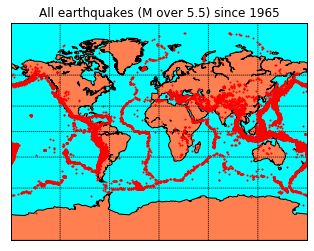

In [52]:
m = Basemap(
    projection = "mill",
    llcrnrlat = -90,
    urcrnrlat = 90,
    llcrnrlon = -180,
    urcrnrlon = 180)
m.drawcoastlines()
m.fillcontinents(color = "coral", lake_color = "aqua")
m.drawparallels(np.arange(-90, 91, 30))
m.drawmeridians(np.arange(-180, 181, 60))
m.drawmapboundary(fill_color = "aqua")

m.plot(earthquake_x, earthquake_y, "o", color = "red", markersize = 1)

plt.title("All earthquakes (M over 5.5) since 1965")
plt.show()

In [53]:
volcano_data = pd.read_csv("data/volcanos.csv")

In [55]:
volcano_data.head()

,Number,Name,Country,Region,Type,Activity Evidence,Last Known Eruption,Latitude,Longitude,Elevation (Meters),Dominant Rock Type,Tectonic Setting
0,210010,West Eifel Volcanic Field,Germany,Mediterranean and Western Asia,Maar(s),Eruption Dated,8300 BCE,50.170,6.85,600,Foidite,Rift Zone / Continental Crust (>25 km)
1,210020,Chaine des Puys,France,Mediterranean and Western Asia,Lava dome(s),Eruption Dated,4040 BCE,45.775,2.97,1464,Basalt / Picro-Basalt,Rift Zone / Continental Crust (>25 km)
2,210030,Olot Volcanic Field,Spain,Mediterranean and Western Asia,Pyroclastic cone(s),Evidence Credible,Unknown,42.170,2.53,893,Trachybasalt / Tephrite Basanite,Intraplate / Continental Crust (>25 km)
3,210040,Calatrava Volcanic Field,Spain,Mediterranean and Western Asia,Pyroclastic cone(s),Eruption Dated,3600 BCE,38.870,-4.02,1117,Basalt / Picro-Basalt,Intraplate / Continental Crust (>25 km)
4,211001,Larderello,Italy,Mediterranean and Western Asia,Explosion crater(s),Eruption Observed,1282 CE,43.250,10.87,500,No Data,Subduction Zone / Continental Crust (>25 km)


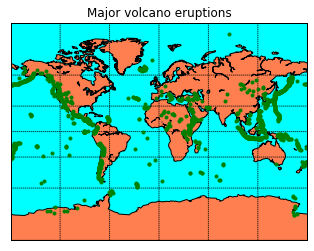

In [61]:
m = Basemap(
    projection = "mill",
    llcrnrlat = -90,
    urcrnrlat = 90,
    llcrnrlon = -180,
    urcrnrlon = 180)
m.drawcoastlines()
m.fillcontinents(color = "coral", lake_color = "aqua")
m.drawparallels(np.arange(-90, 91, 30))
m.drawmeridians(np.arange(-180, 181, 60))
m.drawmapboundary(fill_color = "aqua")

volcano_x, volcano_y = m(
    volcano_data.Longitude.tolist(),
    volcano_data.Latitude.tolist())
m.plot(volcano_x, volcano_y, "o", color = "green", markersize = 3)

plt.title("Major volcano eruptions")
plt.show()

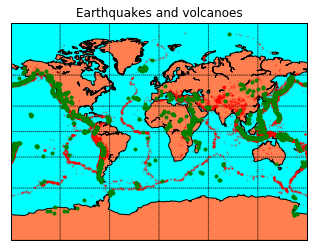

In [64]:
m = Basemap(
    projection = "mill",
    llcrnrlat = -90,
    urcrnrlat = 90,
    llcrnrlon = -180,
    urcrnrlon = 180)
m.drawcoastlines()
m.fillcontinents(color = "coral", lake_color = "aqua")
m.drawparallels(np.arange(-90, 91, 30))
m.drawmeridians(np.arange(-180, 181, 60))
m.drawmapboundary(fill_color = "aqua")

m.plot(earthquake_x, earthquake_y, "o", color = "red", markersize = 1, alpha = 0.2)
m.plot(volcano_x, volcano_y, "o", color = "green", markersize = 3)

plt.title("Earthquakes and volcanoes")
plt.show()

In [66]:
ufo_sightings = pd.read_csv("data/ufo_sightings_scrubbed.csv", low_memory = False)

In [68]:
ufo_sightings

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611
...,...,...,...,...,...,...,...,...,...,...,...
80327,9/9/2013 21:15,nashville,tn,us,light,600,10 minutes,Round from the distance/slowly changing colors...,9/30/2013,36.1658333,-86.784444
80328,9/9/2013 22:00,boise,id,us,circle,1200,20 minutes,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...,9/30/2013,43.6136111,-116.202500
80329,9/9/2013 22:00,napa,ca,us,other,1200,hour,Napa UFO&#44,9/30/2013,38.2972222,-122.284444
80330,9/9/2013 22:20,vienna,va,us,circle,5,5 seconds,Saw a five gold lit cicular craft moving fastl...,9/30/2013,38.9011111,-77.265556


In [70]:
ufo_sightings.columns = [
    "datetime", "city", "state", "country", "shape", "duration (seconds)",
    "duration (hours/min)", "comments", "date posted", "latitude",
    "longitude"]

In [85]:
ufo_sightings = ufo_sightings.drop(ufo_sightings[ufo_sightings.latitude == "33q.200088"].index, axis = 0)

In [86]:
ufo_sightings.latitude = ufo_sightings.latitude.astype(float)

In [87]:
ufo_sightings.dtypes

datetime                 object
city                     object
state                    object
country                  object
shape                    object
duration (seconds)       object
duration (hours/min)     object
comments                 object
date posted              object
latitude                float64
longitude               float64
dtype: object

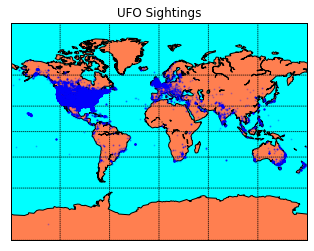

In [89]:
m = Basemap(
    projection = "mill",
    llcrnrlat = -90,
    urcrnrlat = 90,
    llcrnrlon = -180,
    urcrnrlon = 180)
m.drawcoastlines()
m.fillcontinents(color = "coral", lake_color = "aqua")
m.drawparallels(np.arange(-90, 91, 30))
m.drawmeridians(np.arange(-180, 181, 60))
m.drawmapboundary(fill_color = "aqua")

ufo_x, ufo_y = m(
    ufo_sightings.longitude.tolist(),
    ufo_sightings.latitude.tolist())
m.plot(ufo_x, ufo_y, "o", color = "blue", markersize = 1, alpha = 0.2)

plt.title("UFO Sightings")
plt.show()

In [122]:
g = nx.DiGraph()
g.add_edge("a", "b", weight = 0.1)
g.add_edge("b", "c", weight = 1.5)
g.add_edge("a", "c", weight = 1.0)
g.add_edge("c", "d", weight = 2.2)

In [118]:
g.nodes

NodeView(('a', 'b', 'c', 'd'))

In [119]:
g.edges

EdgeView([('a', 'b'), ('a', 'c'), ('b', 'c'), ('c', 'd')])

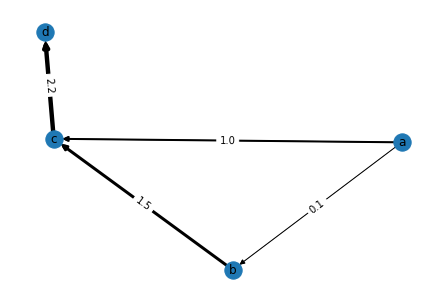

In [123]:
pos = nx.spring_layout(g)
weights = nx.get_edge_attributes(g, "weight")
nx.draw(g, pos, with_labels = True)
nx.draw_networkx_edge_labels(g, pos, edge_labels = weights)
nx.draw_networkx_edges(g, pos, width = [v * 2 for v in weights.values()])
plt.show()

In [124]:
print(nx.shortest_path(g, "b", "d", weight = "weight"), nx.shortest_path_length(g, "b", "d", weight = "weight"))

['b', 'c', 'd'] 3.7


In [126]:
nx.shortest_path(g, "d", "b")

NetworkXNoPath: No path between d and b.